# Machine Learning Assignment

First we import the libraires needed to run this notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import FeatureUnion

Then we load the dataset into a pandas dataframe.

This dataset represents the outcome of a bank marketing campaign, whether it was sucessful or not.
We have the folowing fetures: the age of the customer, their job, marital status, education, default which means whether their credit is in defult or not, their housing loan status, their personal loan status, their contact method, the month and day of the last contact, the duration of the last contact,  the number of contacts during this campaign, the number of days since the last contact from a previous campaign, the previous number of contacts before this current campaign and finally the outcome of the previous marketing campaign.
The target variable y represents whether this campaign is sucessful.

In [77]:
df = pd.read_csv("trainingset.txt")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,44,JobCat9,single,secondary,no,29,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
1,47,JobCat3,married,unknown,no,1506,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
2,31,unknown,single,unknown,no,1,no,no,unknown,5,may,0,1,-1,0,unknown,TypeA
3,26,JobCat6,single,tertiary,no,447,yes,yes,unknown,5,may,0,1,-1,0,unknown,TypeA
4,42,JobCat4,divorced,tertiary,yes,2,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,73,JobCat2,married,secondary,no,2850,no,no,cellular,17,nov,0,1,40,8,failure,TypeB
27268,23,JobCat9,single,secondary,no,505,no,yes,cellular,17,nov,0,2,-1,0,unknown,TypeB
27269,72,JobCat2,married,secondary,no,5715,no,no,cellular,17,nov,0,5,184,3,success,TypeB
27270,57,JobCat3,married,secondary,no,668,no,no,telephone,17,nov,0,4,-1,0,unknown,TypeA


We have 27272 rows of data and 17 columns

In [3]:
df.shape

(27272, 17)

We can notice there are no missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27272 entries, 0 to 27271
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27272 non-null  int64 
 1   job        27272 non-null  object
 2   marital    27272 non-null  object
 3   education  27272 non-null  object
 4   default    27272 non-null  object
 5   balance    27272 non-null  int64 
 6   housing    27272 non-null  object
 7   loan       27272 non-null  object
 8   contact    27272 non-null  object
 9   day        27272 non-null  int64 
 10  month      27272 non-null  object
 11  duration   27272 non-null  int64 
 12  campaign   27272 non-null  int64 
 13  pdays      27272 non-null  int64 
 14  previous   27272 non-null  int64 
 15  poutcome   27272 non-null  object
 16  y          27272 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.5+ MB


We can notice that the duration column is constant, so we can drop it

In [5]:
df["duration"].value_counts()

duration
0    27272
Name: count, dtype: int64

In [78]:
df = df.drop("duration", axis =1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,44,JobCat9,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
1,47,JobCat3,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
2,31,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,TypeA
3,26,JobCat6,single,tertiary,no,447,yes,yes,unknown,5,may,1,-1,0,unknown,TypeA
4,42,JobCat4,divorced,tertiary,yes,2,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,73,JobCat2,married,secondary,no,2850,no,no,cellular,17,nov,1,40,8,failure,TypeB
27268,23,JobCat9,single,secondary,no,505,no,yes,cellular,17,nov,2,-1,0,unknown,TypeB
27269,72,JobCat2,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,TypeB
27270,57,JobCat3,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,TypeA


The columns job, education, contact and poutcome contain many unkown values, however this a real category that shouldn't be considered lika an NA so we will keep these rows:

In [7]:
df.loc[df['job']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
2,31,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,TypeA
142,47,unknown,married,unknown,no,28,no,no,unknown,5,may,2,-1,0,unknown,TypeA
221,59,unknown,divorced,unknown,no,27,no,no,unknown,5,may,3,-1,0,unknown,TypeA
522,35,unknown,single,unknown,no,414,yes,no,unknown,7,may,1,-1,0,unknown,TypeA
636,27,unknown,single,primary,no,50,yes,no,unknown,7,may,2,-1,0,unknown,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26750,46,unknown,married,tertiary,no,8564,no,no,cellular,2,aug,2,342,1,failure,TypeA
26958,45,unknown,married,tertiary,no,406,no,no,cellular,7,sep,1,-1,0,unknown,TypeB
26973,64,unknown,married,unknown,no,2799,no,no,telephone,9,sep,4,-1,0,unknown,TypeA
27231,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,1,185,3,success,TypeA


In [8]:
df.loc[df['education']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
1,47,JobCat3,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
2,31,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,TypeA
7,58,JobCat9,married,unknown,no,71,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
9,45,JobCat11,single,unknown,no,13,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
28,58,JobCat2,married,unknown,no,96,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27224,46,JobCat9,married,unknown,no,3308,no,no,cellular,27,oct,1,91,2,success,TypeB
27231,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,1,185,3,success,TypeA
27236,65,JobCat6,married,unknown,no,2352,no,no,cellular,8,nov,3,188,13,success,TypeA
27240,32,JobCat5,single,unknown,no,2321,no,no,cellular,9,nov,2,99,5,failure,TypeA


In [9]:
df.loc[df['contact']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,44,JobCat9,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
1,47,JobCat3,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
2,31,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,TypeA
3,26,JobCat6,single,tertiary,no,447,yes,yes,unknown,5,may,1,-1,0,unknown,TypeA
4,42,JobCat4,divorced,tertiary,yes,2,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27158,37,JobCat7,single,secondary,no,471,no,no,unknown,15,oct,1,-1,0,unknown,TypeA
27178,28,JobCat8,single,secondary,no,1031,no,no,unknown,20,oct,1,-1,0,unknown,TypeA
27179,58,JobCat2,married,primary,no,742,no,no,unknown,20,oct,1,-1,0,unknown,TypeA
27219,40,JobCat4,single,tertiary,no,262,yes,yes,unknown,26,oct,1,-1,0,unknown,TypeA


In [10]:
df.loc[df['poutcome']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,44,JobCat9,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
1,47,JobCat3,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
2,31,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,TypeA
3,26,JobCat6,single,tertiary,no,447,yes,yes,unknown,5,may,1,-1,0,unknown,TypeA
4,42,JobCat4,divorced,tertiary,yes,2,yes,no,unknown,5,may,1,-1,0,unknown,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27264,36,JobCat9,married,secondary,no,557,yes,no,cellular,16,nov,4,-1,0,unknown,TypeB
27265,32,JobCat11,single,secondary,no,557,no,no,cellular,17,nov,1,-1,0,unknown,TypeB
27266,21,JobCat5,single,tertiary,no,113,no,no,cellular,17,nov,1,-1,0,unknown,TypeB
27268,23,JobCat9,single,secondary,no,505,no,yes,cellular,17,nov,2,-1,0,unknown,TypeB


## Data exploration

We can get the descriptive statistics of our quantitative variables:

In [11]:
df.describe()

,age,balance,day,campaign,pdays,previous
count,27272.000000,27272.000000,27272.000000,27272.000000,27272.000000,27272.000000
mean,39.880463,1361.079459,15.769287,2.739623,40.074105,0.578872
std,11.426248,3015.207142,8.300983,3.011097,100.200984,1.942882
min,16.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000
25%,31.000000,73.000000,8.000000,1.000000,-1.000000,0.000000
50%,37.000000,447.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1423.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,63.000000,871.000000,58.000000


Now we can inspect the distribution of each of the various features:

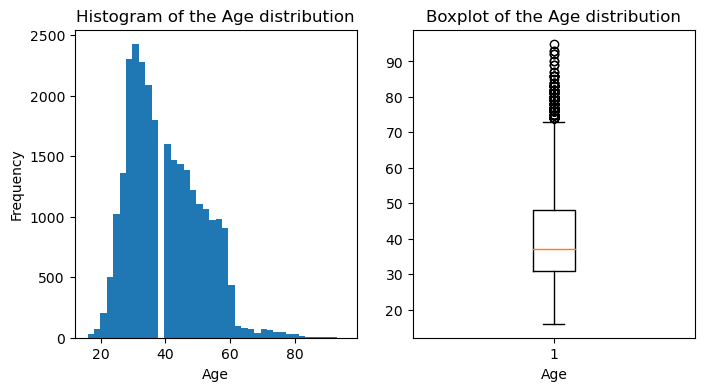

In [156]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["age"].values, bins=40)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of the Age distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["age"].values)
plt.xlabel("Age")
plt.title("Boxplot of the Age distribution")

plt.show()

We can see that the age feature seems approximately normally distributed. However as seen on the boxplot there are many outliers

In [157]:
iqr = df["age"].quantile(0.75) - df["age"].quantile(0.25)
outliers = df.loc[df["age"] > df["age"].quantile(0.75) + 1.5 * iqr]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
17617,75,JobCat2,divorced,primary,no,46,no,no,cellular,2,feb,1,-1,0,unknown,TypeA
17654,83,JobCat2,married,tertiary,no,6236,no,no,cellular,2,feb,2,-1,0,unknown,TypeA
17982,75,JobCat2,divorced,primary,no,3881,yes,no,cellular,4,feb,3,-1,0,unknown,TypeB
18701,90,JobCat2,divorced,secondary,no,1,no,no,cellular,13,feb,3,-1,0,unknown,TypeB
18711,82,JobCat2,married,tertiary,no,278,no,no,cellular,16,feb,7,-1,0,unknown,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27189,77,JobCat2,married,secondary,no,820,no,no,telephone,21,oct,2,181,4,success,TypeB
27201,77,JobCat2,divorced,primary,no,2693,no,no,cellular,25,oct,2,94,12,other,TypeA
27210,78,JobCat6,married,unknown,no,1780,yes,no,cellular,25,oct,2,185,7,success,TypeB
27231,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,1,185,3,success,TypeA


These outliers reperesent the older clients so we don't remove them as they are indeed valid values.

We can see that the majority of the customers belong to Job Category 3 and 6:

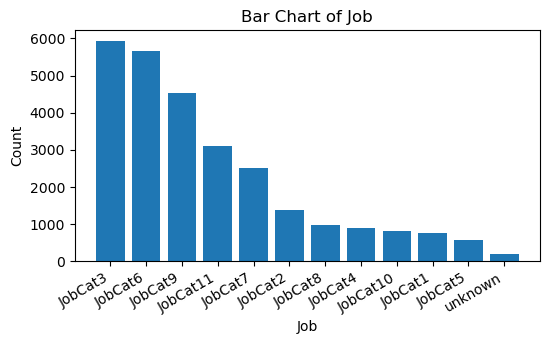

In [158]:
plt.figure(figsize=(6, 3))
plt.bar(df["job"].value_counts().index, df["job"].value_counts().values)
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.title("Bar Chart of Job")
plt.show()

For the martial feature, we can see that the majority of customers are married

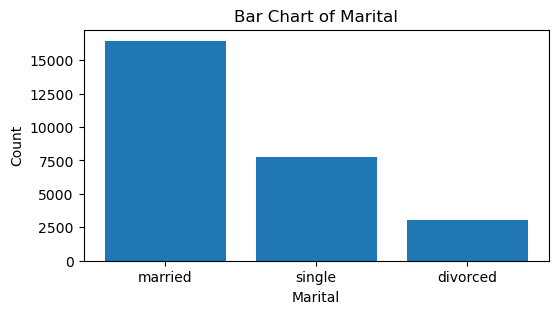

In [159]:
plt.figure(figsize=(6, 3))
plt.bar(df["marital"].value_counts().index, df["marital"].value_counts().values)
plt.xlabel("Marital")
plt.ylabel("Count")
plt.title("Bar Chart of Marital")
plt.show()

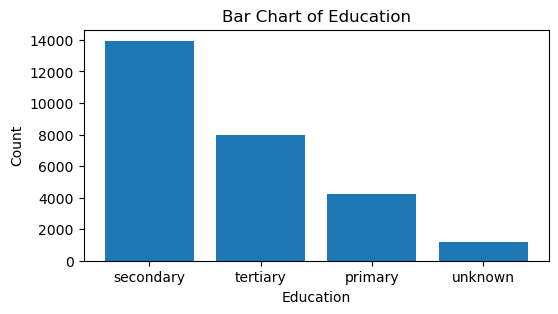

In [160]:
plt.figure(figsize=(6, 3))
plt.bar(df["education"].value_counts().index, df["education"].value_counts().values)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Bar Chart of Education")
plt.show()

The mojority of customers don't have their credit in default

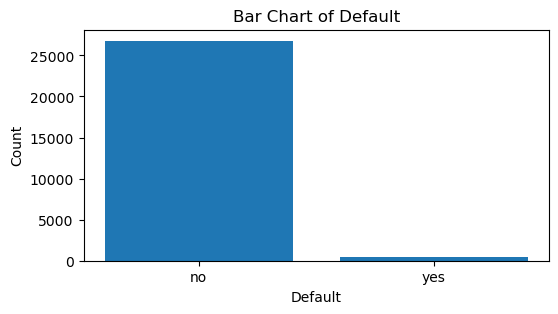

In [161]:
plt.figure(figsize=(6, 3))
plt.bar(df["default"].value_counts().index, df["default"].value_counts().values)
plt.xlabel("Default")
plt.ylabel("Count")
plt.title("Bar Chart of Default")
plt.show()

For the balance distribution, we can see that the histogram is very left skewed as most of the customers have a low balance and there are many outliers

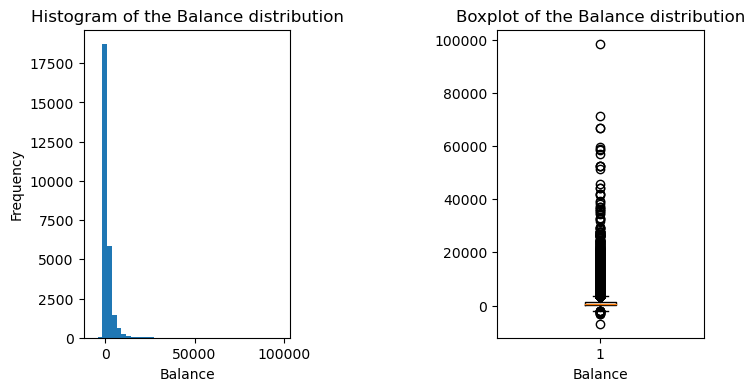

In [162]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["balance"].values, bins=40)
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.title("Histogram of the Balance distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["balance"].values)
plt.xlabel("Balance")
plt.title("Boxplot of the Balance distribution")

plt.subplots_adjust(hspace=0.5, wspace=1) 
plt.show()

In [71]:
iqr = df["balance"].quantile(0.75) - df["balance"].quantile(0.25)
outliers_lower = df.loc[df["balance"] < df["balance"].quantile(0.25) - 1.5 * iqr]
outliers_lower

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
1130,57,JobCat8,married,tertiary,1,-3313,1,1,unknown,9,may,1,-1,0,unknown
4656,49,JobCat6,divorced,tertiary,0,-2049,1,0,unknown,30,may,3,-1,0,unknown
8285,36,JobCat3,divorced,secondary,0,-2093,1,1,unknown,9,jul,3,-1,0,unknown
8298,49,JobCat4,married,secondary,0,-1965,0,1,telephone,10,jul,2,-1,0,unknown
8741,51,JobCat6,divorced,tertiary,0,-2282,1,1,cellular,14,jul,6,-1,0,unknown
9517,49,JobCat6,married,tertiary,1,-6847,0,1,cellular,21,jul,1,-1,0,unknown
11229,40,JobCat9,married,tertiary,1,-2827,1,1,cellular,31,jul,1,-1,0,unknown
12254,33,JobCat6,single,tertiary,1,-1980,1,1,cellular,11,aug,1,-1,0,unknown
15140,49,JobCat3,single,primary,1,-2604,1,0,cellular,18,nov,1,-1,0,unknown
15220,43,JobCat7,married,primary,0,-2122,1,1,cellular,18,nov,3,-1,0,unknown


In [72]:
outliers_higher = df.loc[df["balance"] > df["balance"].quantile(0.75) + 1.5 * iqr]
outliers_higher

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
41,51,JobCat6,married,tertiary,0,6530,1,0,unknown,5,may,1,-1,0,unknown
44,33,JobCat3,single,secondary,0,12223,1,1,unknown,5,may,1,-1,0,unknown
121,40,JobCat7,divorced,unknown,0,4384,1,0,unknown,5,may,1,-1,0,unknown
122,54,JobCat6,married,secondary,0,4080,0,0,unknown,5,may,1,-1,0,unknown
233,40,JobCat6,married,secondary,0,8486,0,0,unknown,6,may,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27241,60,JobCat7,married,secondary,0,4428,0,0,cellular,9,nov,1,96,6,failure
27245,33,JobCat7,married,tertiary,0,4655,0,0,cellular,9,nov,2,-1,0,unknown
27254,60,JobCat7,married,tertiary,0,4256,1,0,cellular,16,nov,1,92,4,success
27258,75,JobCat2,divorced,tertiary,0,3810,1,0,cellular,16,nov,1,183,1,failure


These outliers represent the customers with either very high balances in their account or very low (in the negatives). These are actual values so we will not remove these outliers.

For the housing feature, slightly more customers have a house loan.

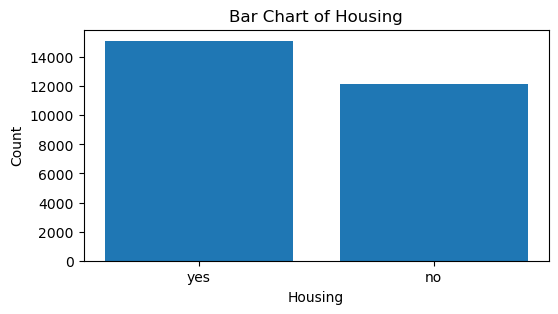

In [164]:
plt.figure(figsize=(6, 3))
plt.bar(df["housing"].value_counts().index, df["housing"].value_counts().values)
plt.xlabel("Housing")
plt.ylabel("Count")
plt.title("Bar Chart of Housing")
plt.show()

For the loan feature, most customers don't have a personal loan.

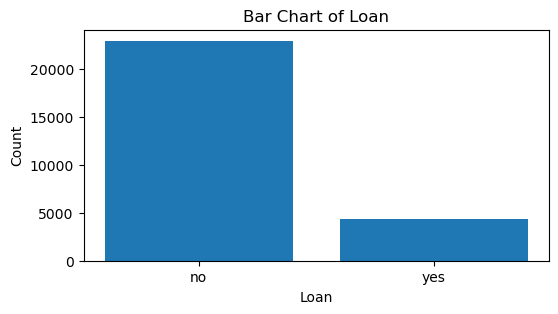

In [165]:
plt.figure(figsize=(6, 3))
plt.bar(df["loan"].value_counts().index, df["loan"].value_counts().values)
plt.xlabel("Loan")
plt.ylabel("Count")
plt.title("Bar Chart of Loan")
plt.show()

Most customers are contacted via their mobile phone:

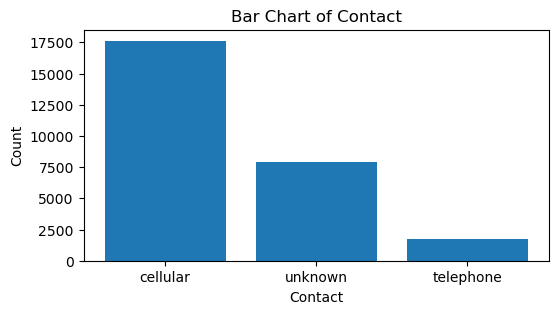

In [166]:
plt.figure(figsize=(6, 3))
plt.bar(df["contact"].value_counts().index, df["contact"].value_counts().values)
plt.xlabel("Contact")
plt.ylabel("Count")
plt.title("Bar Chart of Contact")
plt.show()

The day feature is not really normally distributed as it represents the day of the month the last contact was and there are no outliers

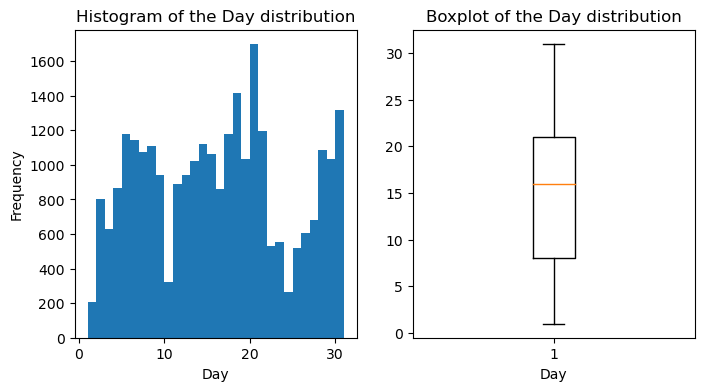

In [167]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["day"].values, bins=30)
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.title("Histogram of the Day distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["day"].values)
plt.xlabel("Day")
plt.title("Boxplot of the Day distribution")

plt.show()

A lot of the customers were previously contacted in May

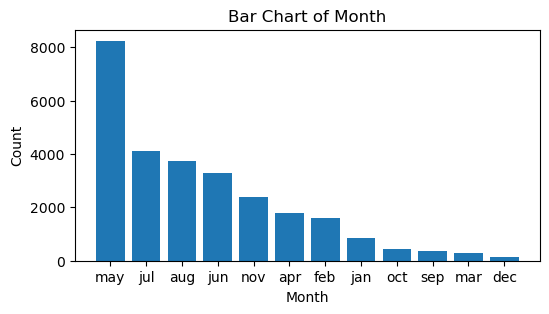

In [168]:
plt.figure(figsize=(6, 3))
plt.bar(df["month"].value_counts().index, df["month"].value_counts().values)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Bar Chart of Month")
plt.show()

The campaign feature is very left skewed as it represents the number of contacts during the current campaign, and most customers haven't been contacted many times

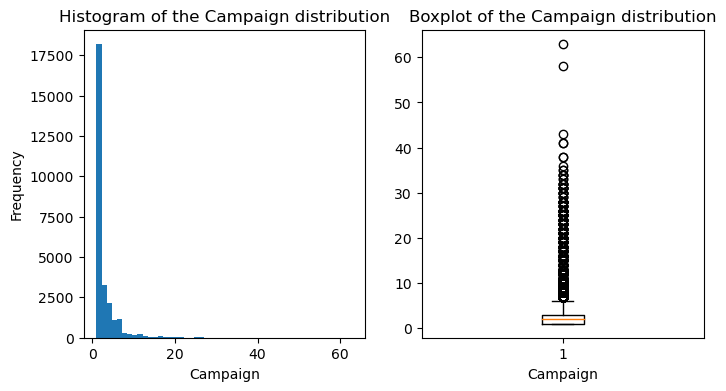

In [169]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["campaign"].values, bins=50)
plt.xlabel("Campaign")
plt.ylabel("Frequency")
plt.title("Histogram of the Campaign distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["campaign"].values)
plt.xlabel("Campaign")
plt.title("Boxplot of the Campaign distribution")

plt.show()

In [170]:
iqr = df["campaign"].quantile(0.75) - df["campaign"].quantile(0.25)
outliers = df.loc[df["campaign"] > df["campaign"].quantile(0.75) + 1.5 * iqr]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
462,59,JobCat7,married,secondary,no,307,yes,yes,unknown,6,may,7,-1,0,unknown,TypeA
660,52,JobCat9,married,unknown,no,133,yes,no,unknown,7,may,8,-1,0,unknown,TypeA
840,35,JobCat11,married,primary,no,242,yes,no,unknown,8,may,8,-1,0,unknown,TypeA
890,43,JobCat7,single,unknown,no,193,yes,no,unknown,8,may,7,-1,0,unknown,TypeA
906,33,JobCat8,single,tertiary,no,538,yes,yes,unknown,8,may,9,-1,0,unknown,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26881,61,JobCat2,married,tertiary,no,5267,no,no,cellular,18,aug,7,188,3,success,TypeA
26887,32,JobCat9,single,tertiary,no,2481,no,no,cellular,23,aug,16,192,14,other,TypeA
26933,23,JobCat9,single,secondary,no,1298,no,no,cellular,2,sep,7,94,2,other,TypeA
26993,35,JobCat7,single,tertiary,no,1189,no,no,cellular,13,sep,9,199,4,other,TypeB


We can see that the outliers represent the customers who have been contacted many times (7 or more), so as these are reasonable values we don't remove them

For the Pdays feature, we also have a very left skewed histogram and many outliers, this is because the majority of customers don't have a number of days since they were last contacted in a previous campaign which is signaled by -1.

In [73]:
df["pdays"].value_counts()

pdays
-1      22313
 182       99
 92        87
 91        83
 183       81
        ...  
 592        1
 558        1
 435        1
 544        1
 530        1
Name: count, Length: 499, dtype: int64

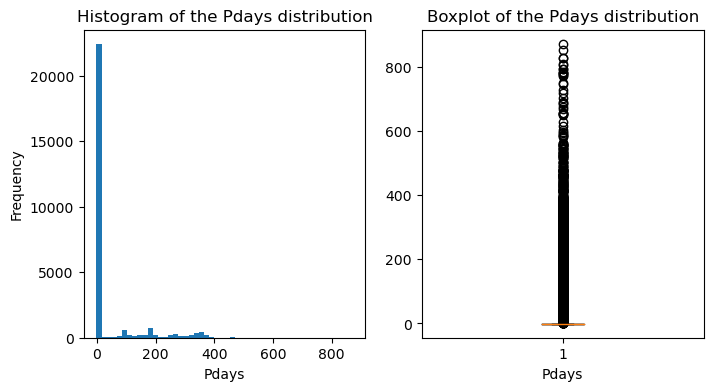

In [171]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["pdays"].values, bins=50)
plt.xlabel("Pdays")
plt.ylabel("Frequency")
plt.title("Histogram of the Pdays distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["pdays"].values)
plt.xlabel("Pdays")
plt.title("Boxplot of the Pdays distribution")

plt.show()

In [172]:
iqr = df["pdays"].quantile(0.75) - df["pdays"].quantile(0.25)
outliers = df.loc[df["pdays"] > df["pdays"].quantile(0.75) + 1.5 * iqr]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
14495,42,JobCat11,single,secondary,no,-247,yes,yes,telephone,21,oct,1,166,1,other,TypeB
14502,34,JobCat6,married,tertiary,no,2415,yes,no,telephone,22,oct,1,86,4,other,TypeA
14504,34,JobCat6,married,tertiary,no,0,yes,no,telephone,23,oct,1,143,3,failure,TypeB
14507,56,JobCat9,married,secondary,no,589,yes,no,unknown,23,oct,1,147,2,success,TypeB
14534,51,JobCat11,single,secondary,no,3132,no,no,telephone,5,nov,1,176,1,failure,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27261,59,JobCat6,married,tertiary,no,138,yes,yes,cellular,16,nov,2,187,5,failure,TypeA
27263,32,JobCat3,single,secondary,no,1475,yes,no,cellular,16,nov,3,530,12,other,TypeA
27267,73,JobCat2,married,secondary,no,2850,no,no,cellular,17,nov,1,40,8,failure,TypeB
27269,72,JobCat2,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,TypeB


As we can see the outliers represent the actual number of days since the last contact, so naturally we can't remove them.

Similarly for the previous feature, we also have a very left skewed histogram and many outliers. This because for a majority of cutomers there have not been any previous contacts (0).


In [74]:
df["previous"].value_counts()

previous
0     22313
1      1680
2      1234
3       697
4       417
5       257
6       175
7       123
8        78
9        61
10       47
11       45
12       33
13       24
15       13
17       11
14       11
16        8
19        8
23        5
20        5
25        4
24        3
27        3
21        3
22        3
38        2
30        2
51        1
18        1
58        1
32        1
40        1
55        1
35        1
Name: count, dtype: int64

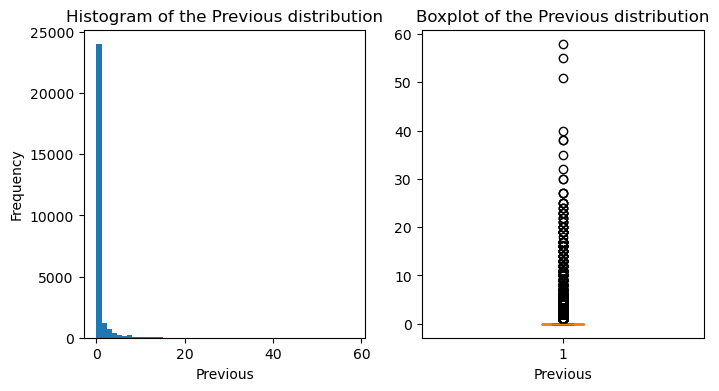

In [173]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["previous"].values, bins=50)
plt.xlabel("Previous")
plt.ylabel("Frequency")
plt.title("Histogram of the Previous distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["previous"].values)
plt.xlabel("Previous")
plt.title("Boxplot of the Previous distribution")

plt.show()

In [174]:
iqr = df["previous"].quantile(0.75) - df["previous"].quantile(0.25)
outliers = df.loc[df["previous"] > df["previous"].quantile(0.75) + 1.5 * iqr]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
14495,42,JobCat11,single,secondary,no,-247,yes,yes,telephone,21,oct,1,166,1,other,TypeB
14502,34,JobCat6,married,tertiary,no,2415,yes,no,telephone,22,oct,1,86,4,other,TypeA
14504,34,JobCat6,married,tertiary,no,0,yes,no,telephone,23,oct,1,143,3,failure,TypeB
14507,56,JobCat9,married,secondary,no,589,yes,no,unknown,23,oct,1,147,2,success,TypeB
14534,51,JobCat11,single,secondary,no,3132,no,no,telephone,5,nov,1,176,1,failure,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27261,59,JobCat6,married,tertiary,no,138,yes,yes,cellular,16,nov,2,187,5,failure,TypeA
27263,32,JobCat3,single,secondary,no,1475,yes,no,cellular,16,nov,3,530,12,other,TypeA
27267,73,JobCat2,married,secondary,no,2850,no,no,cellular,17,nov,1,40,8,failure,TypeB
27269,72,JobCat2,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,TypeB


So as we can see that the outliers are the customers that have had previous contacts in previous campaigns, this is important information so we can't remove these outliers.

We can see as noted previously, that the majority of customers don't have a previous outcome (unknown):

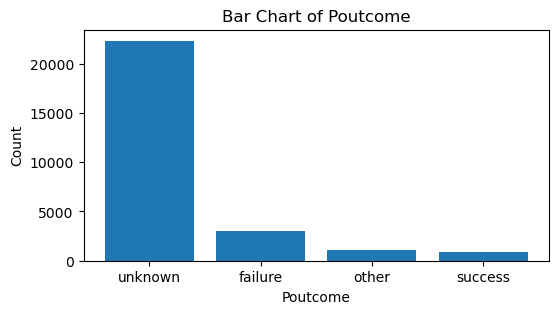

In [175]:
plt.figure(figsize=(6, 3))
plt.bar(df["poutcome"].value_counts().index, df["poutcome"].value_counts().values)
plt.xlabel("Poutcome")
plt.ylabel("Count")
plt.title("Bar Chart of Poutcome")
plt.show()

Now we can inspect the target variable:

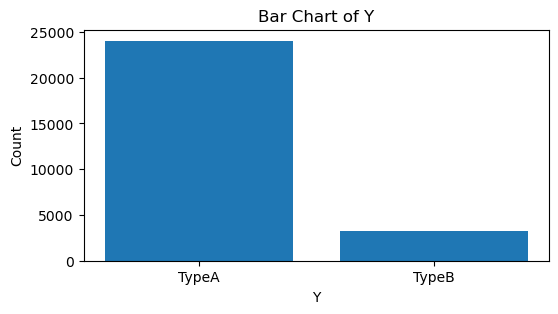

In [176]:
plt.figure(figsize=(6, 3))
plt.bar(df["y"].value_counts().index, df["y"].value_counts().values)
plt.xlabel("Y")
plt.ylabel("Count")
plt.title("Bar Chart of Y")
plt.show()

We can see that the classes are very unbalanced, TypeA is way more present than TypeB. To fix this issue we will need to use resampling techniques.

Now we can check the types of the features

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Certain columns should be boolean columns, so we convert them directly:

In [79]:
df["default"] = df["default"].replace({"yes": 1, "no": 0})
df["housing"] = df["housing"].replace({"yes": 1, "no": 0})
df["loan"] = df["loan"].replace({"yes": 1, "no": 0})
df["y"] = df["y"].replace({"TypeA": 1, "TypeB": 0}) #We encode the target variable assigning the majority class Type A to 1 and Type B to 0

We have the updated descriptive statistics below:

In [80]:
df.describe()

,age,default,balance,housing,loan,day,campaign,pdays,previous,y
count,27272.000000,27272.000000,27272.000000,27272.000000,27272.000000,27272.000000,27272.000000,27272.000000,27272.000000,27272.000000
mean,39.880463,0.017747,1361.079459,0.554818,0.159541,15.769287,2.739623,40.074105,0.578872,0.881123
std,11.426248,0.132033,3015.207142,0.496995,0.366186,8.300983,3.011097,100.200984,1.942882,0.323649
min,16.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,31.000000,0.000000,73.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,1.000000
50%,37.000000,0.000000,447.000000,1.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,0.000000,1423.000000,1.000000,0.000000,21.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.000000,1.000000,31.000000,63.000000,871.000000,58.000000,1.000000


Now we can check the correlation between the quantitative features and plot a correlation heatmap.

First we seperate the quantitative columns:

In [81]:
df_quantitative = df[["age", "default", "balance", "housing", "loan", "day", "campaign", "pdays", "previous", "y"]]

We get the correlation matrix, based on the Pearson correlation:

In [82]:
corr_matrix = df_quantitative.corr()
corr_matrix

,age,default,balance,housing,loan,day,campaign,pdays,previous,y
age,1.000000,-0.018865,0.093244,-0.180073,-0.011637,-0.008058,0.011199,-0.019888,0.003276,-0.022048
default,-0.018865,1.000000,-0.066442,-0.002533,0.084020,0.017821,0.016604,-0.035591,-0.027041,0.019338
balance,0.093244,-0.066442,1.000000,-0.073684,-0.087861,-0.001638,-0.008619,0.004912,0.021598,-0.051788
housing,-0.180073,-0.002533,-0.073684,1.000000,0.041503,-0.020728,-0.027082,0.124731,0.043979,0.137856
loan,-0.011637,0.084020,-0.087861,0.041503,1.000000,0.016875,0.008976,-0.028398,-0.020032,0.068759
day,-0.008058,0.017821,-0.001638,-0.020728,0.016875,1.000000,0.160933,-0.090205,-0.051620,0.030724
campaign,0.011199,0.016604,-0.008619,-0.027082,0.008976,0.160933,1.000000,-0.087303,-0.036200,0.073330
pdays,-0.019888,-0.035591,0.004912,0.124731,-0.028398,-0.090205,-0.087303,1.000000,0.535486,-0.103614
previous,0.003276,-0.027041,0.021598,0.043979,-0.020032,-0.051620,-0.036200,0.535486,1.000000,-0.117055
y,-0.022048,0.019338,-0.051788,0.137856,0.068759,0.030724,0.073330,-0.103614,-0.117055,1.000000


We can plot this as a heatmap for a better view using the heatmap from the seaborn library (as it is easier than just using matplotlib):

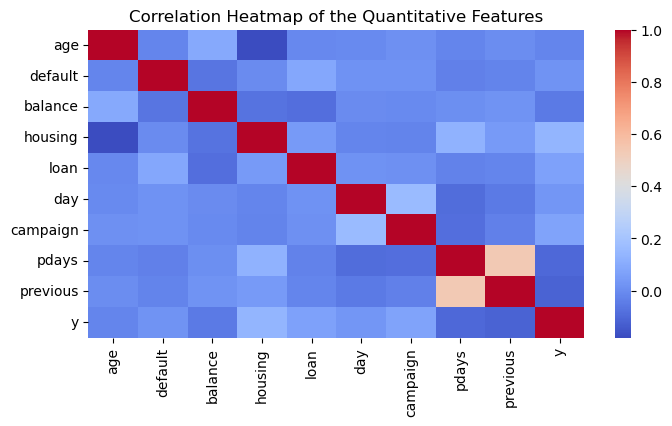

In [83]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, cmap='coolwarm') 
plt.title('Correlation Heatmap of the Quantitative Features')
plt.show()

We can see that most features are not very correlated between each other or with the target variable. Only pdays and previous are correlated which makes sense as they refer to the previous campaign

## Training the different models and hyperparameter tunning
Fist we split the data in train (70%) and test (30%) set:

In [5]:
y = df.pop('y').values
X = df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)#we use stratify as we have imbalanced classes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19090, 15) (8182, 15) (19090,) (8182,)


Given the very unbalanced classes we can perform oversampling using SMOTE on the train data only to avoid data leakage

We use SMOTENC which works for numerical and categorical features:

In [6]:
smote = SMOTENC(categorical_features=[1,2,3,8,10,14], sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape, X_test.shape, y_train_resampled.shape, y_test.shape)

(33642, 15) (8182, 15) (33642,) (8182,)


We can also try using udersampling with Random Undersampling, however overall undersampling performs worse than oversampling. For Logistic Regression there is no real improvements and for Random Forest and Gradient Boosting the results are worse

In [71]:
#from imblearn.under_sampling import RandomUnderSampler

#random_undersampling = RandomUnderSampler(random_state=42)
#X_train_resampled, y_train_resampled = random_undersampling.fit_resample(X_train, y_train)

#print(X_train_resampled.shape, X_test.shape, y_train_resampled.shape, y_test.shape)

(4538, 15) (8182, 15) (4538,) (8182,)


We define our preprocessing pipeline: we do One Hot Encoding for the categorical features and scaling for the numeric features.

We seperate the categorical and numeric features indexes

In [7]:
numerical_features = df.select_dtypes(include=['int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns
categorical_indexes = [df.columns.get_loc(col) for col in categorical_features]
numerical_indexes = [df.columns.get_loc(col) for col in numerical_features]
print(numerical_features)
print(categorical_features)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'campaign',
       'pdays', 'previous'],
      dtype='object')
Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')


In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_indexes),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_indexes)
    ])

For feature selection we use both filter and wrapper methods: we use information gain and forward sequential search, which we will do as part of the piepline.

I also tried tuning for k (the number of features) in the grid search but it was taking a very long time, and since we will refit a seperate model afterward to make our predictions, I chose to only test between information gain and forward sequential search taking k=10:

In [20]:
#select_k_best = SelectKBest(score_func=mutual_info_classif, k=10)
#sfs_lr = SequentialFeatureSelector(LogisticRegression(), k_features= 10, forward=True, scoring='f1', cv=5)
#sfs_rf = SequentialFeatureSelector(RandomForestClassifier(), k_features= 10, forward=True, scoring='f1', cv=5)
#sfs_gb = SequentialFeatureSelector(GradientBoostingClassifier(), k_features= 10, forward=True, scoring='f1', cv=5)

Now we test out different models, making seperate pipelines for each. First we start with Logistic Regression:

In [41]:
# #In our pipeline we define the preprocessing pipeline, the feature selection (chosing between info gain and ssequential search)
# #and the classifier
# LRpipe  = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('feature_selection', FeatureUnion([
#          ('select_k_best', select_k_best),
#          ('sfs_lr', sfs_lr)
#     ])),
#     ('classifier', LogisticRegression())])

# #we define the hyper parameter grid, tuning on the different penalization methods, the regularization strength and the solver used
# param_grid_lr = {'classifier__penalty': ['l1', 'l2'],
#                  'classifier__C': [0.01, 0.1, 1, 10],
#                  'classifier__solver': ['lbfgs', 'liblinear', 'saga']}

# pipe_gs_lr = GridSearchCV(LRpipe,param_grid_lr,cv=5, scoring ='f1',
#                       verbose = 1, n_jobs = -1) #we use a stratified 5 fold cross validation, we set scoring to f1
#                                                #as we have unbalanced classes

# pipe_gs_lr = pipe_gs_lr.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\jess6\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jess6\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jess6\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jess6\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fi

We get the best parameters and the best f1 score:

In [42]:
# print(pipe_gs_lr.best_params_)
# print(pipe_gs_lr.best_score_)

{'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.7439632468642527


We save the outputs of the grid search (as when we do run all the outputs will be gone) 

    {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
    0.7439632468642527

We make predictions on the test set:

In [43]:
# y_pred_gs_lr = pipe_gs_lr.predict(X_test)
# y_pred_gs_lr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

We get the classification report, the AUC and the confusion matrix:

In [44]:
# print(classification_report(y_test, y_pred_gs_lr))
# print(roc_auc_score(y_test, pipe_gs_lr.predict_proba(X_test)[:, 1]))
# confusion_matrix(y_test, y_pred_gs_lr)

              precision    recall  f1-score   support

           0       0.24      0.64      0.35       973
           1       0.94      0.73      0.82      7209

    accuracy                           0.72      8182
   macro avg       0.59      0.68      0.59      8182
weighted avg       0.85      0.72      0.77      8182

0.7446431654391129


array([[ 619,  354],
       [1937, 5272]], dtype=int64)

                precision    recall  f1-score   support

           0       0.24      0.64      0.35       973
           1       0.94      0.73      0.82      7209

    accuracy                           0.72      8182
    macro avg       0.59      0.68      0.59      8182
    weighted avg       0.85      0.72      0.77      8182

    0.7446431654391129
    
    array([[ 619,  354],
           [1937, 5272]], dtype=int64)

We can notice that Logistic Regression gives bad results and is biased towards the majority class. We can see there are many false neagtives (1937) and false postives (354) as seen in the confusion matrix.
We can see that the macro average(average of the metrics calculated independently for each class) is quite low 0.59 while the accuracy(0.72) is inflated by the majority class.

We can plot the ROC curve:

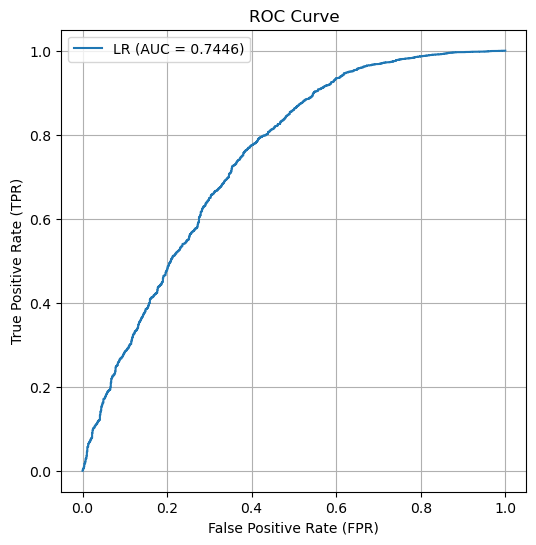

In [45]:
# y_pred_lr = pipe_gs_lr.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
# auc = roc_auc_score(y_test, y_pred_lr)

# plt.figure(figsize=(6, 6))
# plt.plot(fpr, tpr, label=f'LR (AUC = {auc:.4f})')
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('ROC Curve')
# plt.legend()
# plt.grid(True)
# plt.show()

For Random Forest we define a similar piepline, but we remove the feature selection part as the sequential search takes a very long time for that algorithm, resulting in an extremely long grid search:

In [29]:
# RFpipe  = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier())])

##we define the hyper parameter grid, tuning on the number of estimators used, the criterion, the minimum number of samples 
##required to split an internal node and the minimum number of samples required to be at a leaf node
# param_grid_rf = {'classifier__n_estimators':[20, 50, 100], 
#                  'classifier__criterion':['gini','entropy', 'log_loss'],
#                  'classifier__min_samples_split': [2, 5, 10],
#                  'classifier__min_samples_leaf': [1, 2, 4]}

# pipe_gs_rf = GridSearchCV(RFpipe,param_grid_rf,cv=5, scoring='f1', 
#                       verbose = 1, n_jobs = -1)#we use a stratified 5 fold cross validation, we set scoring to f1
#                                                #as we have unbalanced classes

# pipe_gs_rf = pipe_gs_rf.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [30]:
# print(pipe_gs_rf.best_params_)
# print(pipe_gs_rf.best_score_)

{'classifier__criterion': 'log_loss', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
0.9186269984741203


    {'classifier__criterion': 'log_loss', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}

    0.9186269984741203

In [31]:
# y_pred_gs_rf = pipe_gs_rf.predict(X_test)
# y_pred_gs_rf

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

We have the classification report, AUC and confusion matrix:

In [32]:
# print(classification_report(y_test, y_pred_gs_rf))
# print(roc_auc_score(y_test, pipe_gs_rf.predict_proba(X_test)[:, 1]))
# confusion_matrix(y_test, y_pred_gs_rf)

              precision    recall  f1-score   support

           0       0.45      0.40      0.42       973
           1       0.92      0.93      0.93      7209

    accuracy                           0.87      8182
   macro avg       0.69      0.67      0.68      8182
weighted avg       0.86      0.87      0.87      8182

0.7768603736593389


array([[ 388,  585],
       [ 470, 6739]], dtype=int64)

                  precision    recall  f1-score   support

           0       0.45      0.40      0.42       973
           1       0.92      0.93      0.93      7209

    accuracy                           0.87      8182
    macro avg       0.69      0.67      0.68      8182
    weighted avg       0.86      0.87      0.87      8182


    0.7768603736593389


    array([[ 388,  585],
       [ 470, 6739]], dtype=int64)

We can notice that Random Forest gives better results but is still biased towards the majority class. We can see there are some false neagtives (470) and many false postives (585) as seen in the confusion matrix. We can see that the macro average(average of the metrics calculated independently for each class) is higher 0.68 while the accuracy(0.87) is still inflated by the majority class.

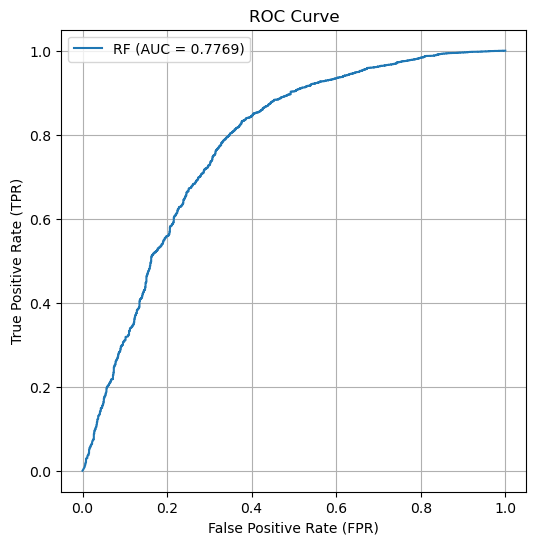

In [33]:
# y_pred_rf = pipe_gs_rf.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
# auc = roc_auc_score(y_test, y_pred_rf)

# plt.figure(figsize=(6, 6))
# plt.plot(fpr, tpr, label=f'RF (AUC = {auc:.4f})')
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('ROC Curve')
# plt.legend()
# plt.grid(True)
# plt.show()

For Gradient Boosting we define a similar piepline, but we also remove the feature selection part as the sequential search takes a very long time for that algorithm, resulting in an extremely long grid search:

In [46]:
# GBpipe  = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', GradientBoostingClassifier())])

##we define the hyper parameter grid, tuning on the learning rate, the number of estimators used, the criterion, the minimum number of samples 
##required to split an internal node and the minimum number of samples required to be at a leaf node
# param_grid_gb = {'classifier__learning_rate': [0.01, 0.05, 0.1],
#                  'classifier__n_estimators':[50], #we put only 50 estimators as the grid search takes a long time
#                  'classifier__min_samples_split': [2, 5, 10],
#                  'classifier__min_samples_leaf': [1, 2, 4]}

# pipe_gs_gb = GridSearchCV(GBpipe,param_grid_gb,cv=5,scoring='f1',
#                       verbose = 1, n_jobs = -1)#we use a stratified 5 fold cross validation, we set scoring to f1
#                                                #as we have unbalanced classes

# pipe_gs_gb = pipe_gs_gb.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [47]:
# print(pipe_gs_gb.best_params_)
# print(pipe_gs_gb.best_score_)

{'classifier__learning_rate': 0.1, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
0.8952394055739763


    {'classifier__learning_rate': 0.1, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
    0.8952394055739763

In [48]:
# y_pred_gs_gb = pipe_gs_gb.predict(X_test)
# y_pred_gs_gb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [49]:
# print(classification_report(y_test, y_pred_gs_gb))
# print(roc_auc_score(y_test, pipe_gs_gb.predict_proba(X_test)[:, 1]))
# confusion_matrix(y_test, y_pred_gs_gb)

              precision    recall  f1-score   support

           0       0.43      0.38      0.40       973
           1       0.92      0.93      0.93      7209

    accuracy                           0.87      8182
   macro avg       0.68      0.66      0.66      8182
weighted avg       0.86      0.87      0.86      8182

0.7531777324707027


array([[ 368,  605],
       [ 482, 6727]], dtype=int64)

                precision    recall  f1-score   support

           0       0.43      0.38      0.40       973
           1       0.92      0.93      0.93      7209

    accuracy                           0.87      8182
    macro avg       0.68      0.66      0.66      8182
    weighted avg       0.86      0.87      0.86      8182

    0.7531777324707027
    array([[ 368,  605],
       [ 482, 6727]], dtype=int64)

We can notice that Gradient Boosting gives similar results to Random Forest but slightly worse and still biased towards the majority class. We can see there are some false neagtives (482) and many false postives (605) as seen in the confusion matrix. We can see that the macro average(average of the metrics calculated independently for each class) is 0.66 while the accuracy(0.87) is still inflated by the majority class.

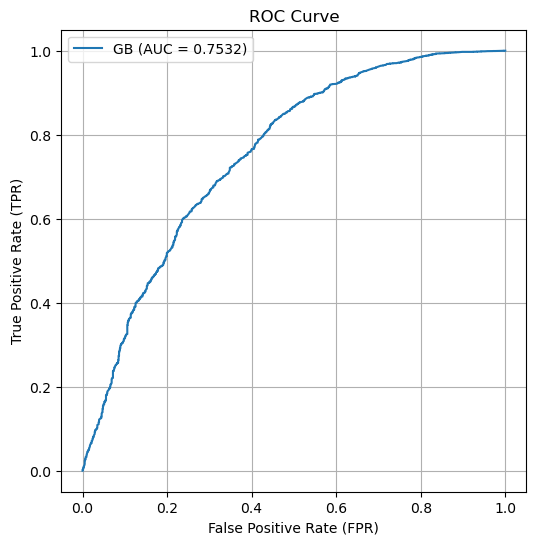

In [50]:
# y_pred_gb = pipe_gs_gb.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
# auc = roc_auc_score(y_test, y_pred_gb)

# plt.figure(figsize=(6, 6))
# plt.plot(fpr, tpr, label=f'GB (AUC = {auc:.4f})')
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('ROC Curve')
# plt.legend()
# plt.grid(True)
# plt.show()

I tried training an SVM model too but it was having convergence problems, and when setting a max_iter parameter to 1000 the performance was very terrible

Overall we can see that the best model in Random Forest. So we will use that model to make the predictions for the querires data.

## Training the best model

Now we will retrain a RF model with the best hyperparameters given by the grid search and do feature selection using the information gain filter method (as the sequential search takes too long given that we retrain multiple models).

We use the preprocessing pipeline to preprocess our resampled data (using SMOTE oversampling):

In [87]:
preprocessor.fit(X_train_resampled)
X_train_preprocessed = preprocessor.transform(X_train_resampled)
X_train_preprocessed

array([[-0.24988017, -0.12515276, -0.58443577, ...,  0.        ,
         0.        ,  1.        ],
       [-0.75654458, -0.12515276,  1.06964645, ...,  0.        ,
         0.        ,  1.        ],
       [-0.75654458, -0.12515276, -0.48848414, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.7109632 , -0.12515276, -0.06608175, ...,  0.        ,
         0.        ,  0.        ],
       [-0.58765644, -0.12515276, -0.4653896 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.42117711, -0.12515276, -0.37048079, ...,  0.        ,
         0.        ,  1.        ]])

We use information gain for feature selection as sequential search takes too long for Random Forest:

In [88]:
i_scores = mutual_info_classif(X_train_preprocessed, y_train_resampled)
i_scores

array([0.44407244, 0.01447589, 0.20748004, 0.1859887 , 0.07759831,
       0.43875798, 0.29630392, 0.10714218, 0.09801568, 0.00245212,
       0.        , 0.00112382, 0.008598  , 0.00388237, 0.00289789,
       0.00171006, 0.00718341, 0.        , 0.00597311, 0.        ,
       0.        , 0.00368742, 0.00453982, 0.0068168 , 0.01126738,
       0.00122459, 0.01043238, 0.00921455, 0.0816728 , 0.0087913 ,
       0.0745533 , 0.00253611, 0.0030835 , 0.00491776, 0.00254205,
       0.003126  , 0.        , 0.00047213, 0.00792097, 0.01444264,
       0.        , 0.006498  , 0.00553389, 0.        , 0.00075335,
       0.05675257, 0.02187447])

We sort the scores in descending order:

In [89]:
FS_DF = pd.DataFrame(i_scores, columns =['I-Gain'])
FS_DF.sort_values(by=['I-Gain'],ascending=False,inplace=True)
FS_DF

,I-Gain
0,0.444072
5,0.438758
6,0.296304
2,0.207480
3,0.185989
7,0.107142
8,0.098016
28,0.081673
4,0.077598
30,0.074553


We select the features with a score higher than 0.05

In [90]:
selected_indices = [i for i, score in enumerate(i_scores) if score > 0.05]

X_train_preprocessed_feat_selected = X_train_preprocessed[:, selected_indices]
X_train_preprocessed_feat_selected

array([[-0.24988017, -0.58443577,  1.1132182 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.75654458,  1.06964645,  1.1132182 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.75654458, -0.48848414, -1.02334556, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.7109632 , -0.06608175, -0.28705408, ...,  1.        ,
         0.        ,  0.        ],
       [-0.58765644, -0.4653896 , -1.02334556, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.42117711, -0.37048079, -1.02334556, ...,  1.        ,
         0.        ,  0.        ]])

We bulid a RF model with the best hyperparameters found by the grid search and fit it on the reduced train data taking only the most relevant features:

In [91]:
best_model = RandomForestClassifier(criterion='log_loss', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100).fit(X_train_preprocessed_feat_selected, y_train_resampled)
best_model

RandomForestClassifier(criterion='log_loss', min_samples_split=5)

Now we test our model on our test set:

We preprocess the test set, take the selected features and make the predictions using our new best model:

In [92]:
X_test_preprocessed = preprocessor.transform(X_test)
X_test_preprocessed_feat_selected = X_test_preprocessed[:, selected_indices]
y_pred_best = best_model.predict(X_test_preprocessed_feat_selected)
y_pred_best

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

We have the classification report, the AUC and the confusion matrix:

In [93]:
print(classification_report(y_test, y_pred_best))
print(roc_auc_score(y_test, best_model.predict_proba(X_test_preprocessed_feat_selected)[:, 1]))
confusion_matrix(y_test, y_pred_best)

              precision    recall  f1-score   support

           0       0.49      0.30      0.38       973
           1       0.91      0.96      0.93      7209

    accuracy                           0.88      8182
   macro avg       0.70      0.63      0.65      8182
weighted avg       0.86      0.88      0.87      8182

0.7380078459080426


array([[ 294,  679],
       [ 300, 6909]], dtype=int64)

We can notice that our model is still biased towards the majority class. We can see there are some false neagtives (317) and many false postives (687) as seen in the confusion matrix. We can see that the macro average(average of the metrics calculated independently for each class) is 0.65 while the accuracy(0.88) is still inflated by the majority class.

Overall, we get similar results to our previous RF model, but this one should generalize better as we use less features.

We have the ROC curve:

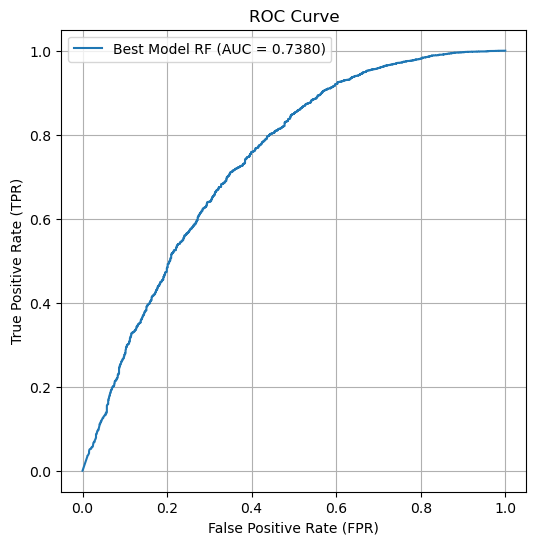

In [94]:
y_pred_proba = best_model.predict_proba(X_test_preprocessed_feat_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'Best Model RF (AUC = {auc:.4f})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## Predictions for the queries data

Now we will make the predictions on the queries dataset:

First we load that dataset:

In [95]:
queries = pd.read_csv("queries.txt")
queries

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,JobCat6,married,tertiary,no,2143,yes,no,unknown,5,may,0,1,-1,0,unknown,?
1,31,JobCat4,married,secondary,no,2,yes,yes,unknown,5,may,0,1,-1,0,unknown,?
2,33,JobCat6,married,tertiary,no,231,yes,no,unknown,5,may,0,1,-1,0,unknown,?
3,43,JobCat9,single,secondary,no,593,yes,no,unknown,5,may,0,1,-1,0,unknown,?
4,27,JobCat11,single,secondary,no,390,yes,no,unknown,5,may,0,1,-1,0,unknown,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17934,23,JobCat5,single,secondary,no,358,no,no,cellular,16,nov,0,1,-1,0,unknown,?
17935,34,JobCat6,single,secondary,no,1511,yes,no,cellular,16,nov,0,1,-1,0,unknown,?
17936,53,JobCat6,married,tertiary,no,583,no,no,cellular,17,nov,0,1,184,4,success,?
17937,51,JobCat9,married,tertiary,no,825,no,no,cellular,17,nov,0,3,-1,0,unknown,?


We apply the same preprocessing steps on the querrries data.

We drop the duration feature as it was constant and the target variable y:

In [96]:
queries = queries.drop(["duration", "y"], axis =1)
queries

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,58,JobCat6,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown
1,31,JobCat4,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown
2,33,JobCat6,married,tertiary,no,231,yes,no,unknown,5,may,1,-1,0,unknown
3,43,JobCat9,single,secondary,no,593,yes,no,unknown,5,may,1,-1,0,unknown
4,27,JobCat11,single,secondary,no,390,yes,no,unknown,5,may,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17934,23,JobCat5,single,secondary,no,358,no,no,cellular,16,nov,1,-1,0,unknown
17935,34,JobCat6,single,secondary,no,1511,yes,no,cellular,16,nov,1,-1,0,unknown
17936,53,JobCat6,married,tertiary,no,583,no,no,cellular,17,nov,1,184,4,success
17937,51,JobCat9,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown


We transform the default, housing and loan into binary columns:

In [97]:
queries["default"] = queries["default"].replace({"yes": 1, "no": 0})
queries["housing"] = queries["housing"].replace({"yes": 1, "no": 0})
queries["loan"] = queries["loan"].replace({"yes": 1, "no": 0})

We apply the same preprocessing pipeline(one hot encoding and scaling) on the queries data:

In [98]:
queries_preprocessed = preprocessor.transform(queries)

C:\Users\jess6\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\jess6\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


Then we select the desired features (chosen by using information gain):

In [99]:
queries_preprocessed_feat_selected = queries_preprocessed[:, selected_indices]
queries_preprocessed_feat_selected

array([[ 1.52344525,  0.17482016,  1.1132182 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.75654458, -0.4878651 ,  1.1132182 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.58765644, -0.41698471,  1.1132182 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.10122491, -0.30803318, -1.02334556, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.93233678, -0.23312901, -1.02334556, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.62121813,  0.04667831, -1.02334556, ...,  1.        ,
         0.        ,  0.        ]])

Now we make the predictions on the queries:

In [100]:
predictions = best_model.predict(queries_preprocessed_feat_selected)
predictions

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

We save them in a dataframe to make transformations and save them in a file easily:

In [101]:
predictions_df = pd.DataFrame(predictions, columns=["y"])
predictions_df

,y
0,1
1,1
2,1
3,1
4,1
...,...
17934,0
17935,1
17936,0
17937,1


We replace the predictions by the correct labels needed for the txt file:

In [102]:
predictions_df["y"] = predictions_df["y"].replace({1 : "TypeA", 0: "TypeB"})
predictions_df

,y
0,TypeA
1,TypeA
2,TypeA
3,TypeA
4,TypeA
...,...
17934,TypeB
17935,TypeA
17936,TypeB
17937,TypeA


Finally we save the predictions in a new txt file:

In [103]:
predictions_df.to_csv('D23124588.txt', sep=',', index=True, header=False)